# Reproducibility between tools
The following scripts checks that solutions are reproducibile between tools. Reproducibility of the model simulations was tested by comparing the numerical SOA results between `sbmlutils` and `iBioSim` for models with unique solutions. Results were assumed as numerical identical if the absolute difference for every time point $t_k$ for all dynamical FBA species $c_k$ in the model  was smaller than the tolerance $\epsilon = 1\mathrm{E}{-3}$, i.e.,
$$
abs(c_{i}(t_k)_{sbmlutils}-c_{i}(t_k)_{ibiosim}) \leq \epsilon \; \forall c_{i}, t_{k}
$$

In [31]:
"""
Helper class for comparing simulation results.
"""
import pandas as pd
from matplotlib import pyplot as plt
from pprint import pprint
import warnings

class DataSetsComparison(object):
    """ Comparing two simulation results.
    Currently only supports comparison between two datasets.
    """
    eps = 1E-3  # tolerance for comparison 
    
    def __init__(self, files, dfs, columns=None):
        self.files = files
        self.columns = columns
        for df in dfs:
            # check that identical number of timepoints
            if len(df) != len(dfs[0]):
                raise ValueError("DataFrames have different length: \
                                 {} != {}".format(len(df), len(dfs[0])))
        
        if columns:
            assert len(self.files) == len(self.columns)
            for column in self.columns:
                assert len(column) == len(self.columns[0])
            
        self.read_dfs(dfs)
        self.diff = self.df_diff()
        
    def read_dfs(self, dfs):
        """ Read the dataframes using the files and given column ids."""
        self.dfs = []
        
        for k, df in enumerate(dfs):
            file = self.files[k]
            if self.columns:
                cols = self.columns[k]
                try:
                    df1 = df[cols]
                except KeyError:              
                    pprint(df.columns)
                    raise
                df1.columns = self.columns[0]  # unify columns
                self.dfs.append(df1)
            else:
                # no columns specified, necessary to figure out the mapping
                print("-"*40)
                print(file)
                print("-"*40)
                pprint(df.columns)
            
        return self.dfs

    def df_diff(self):
        """ DataFrame of all differences between the files."""
        return self.dfs[0]-self.dfs[1]
    
    def is_equal(self):
        """ Check if DataFrames are identical within numerical tolerance."""
        return abs(self.diff.abs().max().max()) <= DataSetsComparison.eps

                                 
    def info(self):
        pprint(self.files)
        pprint(self.columns)
        
    def print_diff(self):
        print("\n# Elements")
        print(self.diff.shape)
        
        print("\n# Maximum column difference")
        print(self.diff.abs().max())
        
        print("\n# Maximum element difference")
        print(self.diff.abs().max().max())
        
        print("\n# Datasets are equal (diff <= eps={})".format(self.eps))
        print(self.is_equal())
        if not (self.is_equal()):
            warnings.warn("Datasets are not equal !")
        
              
    def plot_diff(self):
        for cid in self.diff.columns:
            plt.plot(self.diff[cid], label=cid)
        plt.legend()
        plt.show()
        
    def report(self):
        print("*" * 80)
        self.info()
        self.print_diff()
        print("*" * 80)
        self.plot_diff()
        self.diff

## toy_wholecell

********************************************************************************
['./toy_wholecell/toy_wholecell_mk_v14-sbmlutils_dt1.0_tend50.0.csv',
 './toy_wholecell/toy_wholecell_mk_v14-ibiosim_dt1.0_tend50.0.csv']
[['time', '[A]', '[C]', '[D]'], ['time', 'A', 'C', 'D']]

# Elements
(51, 4)

# Maximum column difference
time    0.000000e+00
[A]     1.280189e-07
[C]     5.191503e-08
[D]     1.242827e-07
dtype: float64

# Maximum element difference
1.28018868395e-07

# Datasets are equal (diff <= eps=0.001)
True
********************************************************************************


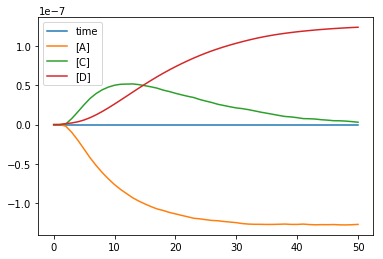

In [32]:
wholecell_version = 14
files = [
        "./toy_wholecell/toy_wholecell_mk_v14-sbmlutils_dt1.0_tend50.0.csv",
        "./toy_wholecell/toy_wholecell_mk_v14-ibiosim_dt1.0_tend50.0.csv"
]
wholecell_dsc = DataSetsComparison(
    files=files, 
    dfs=[pd.read_csv(file) for file in files],
    columns = [
        ["time", "[A]", "[C]", "[D]"],
        ["time", "A", "C", "D"],
    ]
)

wholecell_dsc.report()

## toy_atp

In [33]:
files = [
    "./toy_atp/toy_atp_mk_v12-sbmlutils_dt0.1_tend15.csv",
    "./toy_atp/toy_atp_mk_v12-ibiosim_dt0.1_tend15.csv"
]
atp_dsc = DataSetsComparison(
    files=files,
    dfs = [
        pd.read_csv(files[0], sep="\t"),
        pd.read_csv(files[1])
    ],
    columns = [
        ["time", "[adp]", "[atp]", "[pyr]", "[glc]"],
        ["time", "adp", "atp", "pyr", "glc"],
    ]
)

atp_dsc.report()

ValueError: DataFrames have different length:                                  16 != 151

## diauxic

********************************************************************************
['./diauxic_growth/diauxic_growth_lw_v4-sbmlutils_dt0.01_tend15.0.csv',
 './diauxic_growth/diauxic_growth_lw_v4-ibiosim_dt0.01_tend15.0.csv']
[['time', '[Ac]', '[Glcxt]', '[O2]', '[X]'], ['time', 'Ac', 'Glcxt', 'O2', 'X']]

# Elements
(1501, 5)

# Maximum column difference
time       3.552714e-15
[Ac]       2.245718e-09
[Glcxt]    4.743860e-09
[O2]       1.326935e-09
[X]        3.114851e-10
dtype: float64

# Maximum element difference
4.74386013805e-09

# Datasets are equal (diff <= eps=0.001)
True
********************************************************************************


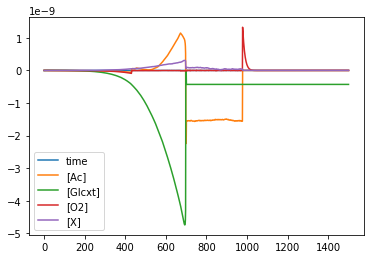

In [34]:
files = [
    "./diauxic_growth/diauxic_growth_lw_v4-sbmlutils_dt0.01_tend15.0.csv",
    "./diauxic_growth/diauxic_growth_lw_v4-ibiosim_dt0.01_tend15.0.csv",
]
diauxic_dsc = DataSetsComparison(
    files=files,
    dfs = [
        pd.read_csv(files[0]),
        pd.read_csv(files[1])
    ],
    columns = [
        ["time", "[Ac]", "[Glcxt]", "[O2]", "[X]"],
        ["time", "Ac", "Glcxt", "O2", "X"],
    ]
)

diauxic_dsc.report()